In [1]:
# K-Means Clustering and also Gaussian Mixture Models (GMM) Clustering
# Goal: Group athletes into distinct training profiles based on their performance metrics.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
scaled_data = pd.read_csv('../data/scaled_clustering_data.csv', index_col=0)
athlete_profiles = pd.read_csv('../data/athlete_profiles.csv')

print(f"Loaded {len(scaled_data)} athletes with {scaled_data.shape[1]} features")
print(f"\nFeatures: {list(scaled_data.columns)}")

Loaded 115 athletes with 6 features

Features: ['avg_weekly_mileage', 'avg_pace_km', 'avg_training_days', 'avg_fatigue_index', 'avg_consistency_index', 'avg_recovery_ratio']


In [ ]:
# using elbow method to find optimal number of clusters for K-Means
# first testing with k=2 ro k=10 and plot the inertia

'''
Intertia = Σ (distance from point to its cluster center)²
    - Measures how tightly the data points in a cluster are grouped around the centroid 
    - Lower inertia means better clustering
    - Usually always decreases with increasing k (more clusters = smaller groups)

Silhouette Score: s(i) = (b(i) - a(i)) / max(a(i), b(i))
    - measures how well each point fits in its cluster compared to other clusters
    - range is -1 to 1
    - higher is better (closer to 1 means well clustered, around 0 means overlapping clusters, negative means misclassified)

Davies-Bouldin Index: DB = (1/k) x Σ max(R_ij)
    - measures average similarity between each cluster and its most similar one
    - lower is better (<1 is good, 1 < 2 is acceptable, >2 is poor)

'''

# K-Means Clustering - Elbow Method
inertias = []
silhouette_scores = []
davies_bouldin_scores = []
K_range = range(2, 11)

print('Testing K-Means clustering for k=2 to k=10...\n')

# looping through the range of k values
for k in K_range:

    # Initialize KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)

    # calculate metrics
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(scaled_data, kmeans.labels_))

    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.3f}, Davies-Bouldin={davies_bouldin_scores[-1]:.3f}")


print("\nElbow method analysis complete!")

Testing K-Means clustering for k=2 to k=10...

K=2: Inertia=396.52, Silhouette=0.501, Davies-Bouldin=0.766
K=3: Inertia=259.30, Silhouette=0.341, Davies-Bouldin=0.980
K=4: Inertia=213.31, Silhouette=0.284, Davies-Bouldin=1.091
K=5: Inertia=172.76, Silhouette=0.298, Davies-Bouldin=0.978
K=6: Inertia=146.00, Silhouette=0.285, Davies-Bouldin=0.971
K=7: Inertia=131.82, Silhouette=0.293, Davies-Bouldin=0.989
K=8: Inertia=118.23, Silhouette=0.284, Davies-Bouldin=1.026
K=9: Inertia=108.11, Silhouette=0.256, Davies-Bouldin=1.061
K=10: Inertia=97.52, Silhouette=0.256, Davies-Bouldin=1.010

Elbow method analysis complete!


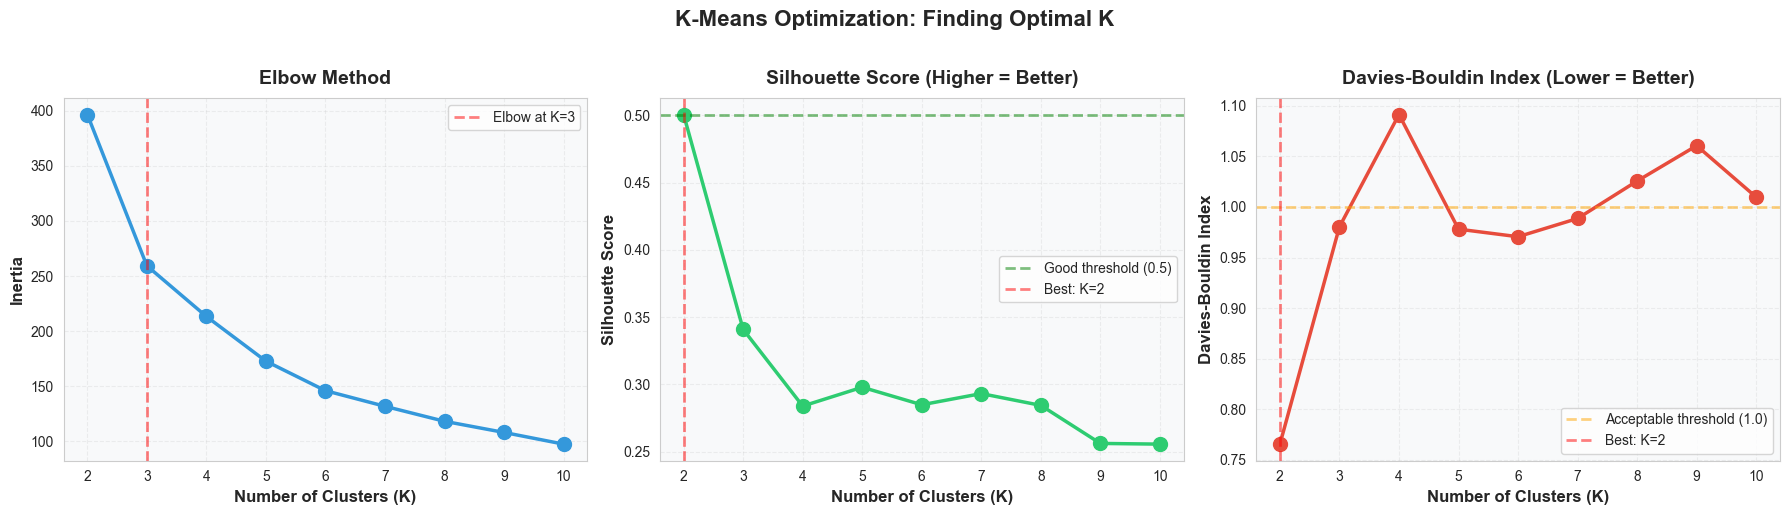


Elbow method visualization complete!

Recommendation: K=2 (best Silhouette + lowest Davies-Bouldin)

Alternative: K=3 (traditional elbow point, but weaker separation)


In [5]:
# vizualizing the results for K-Means Elbow Method

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('K-Means Optimization: Finding Optimal K', fontsize=16, fontweight='bold', y=1.02)

colors = ['#3498db', '#2ecc71', '#e74c3c']

# elbow plot (Inertia)
axes[0].plot(K_range, inertias, 'o-', linewidth=2.5, markersize=10, color=colors[0])
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Inertia', fontsize=12, fontweight='bold')
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold', pad=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xticks(K_range)
axes[0].set_facecolor('#f8f9fa')
# mark elbow point
axes[0].axvline(x=3, color='red', linestyle='--', alpha=0.5, linewidth=2, label='Elbow at K=3')
axes[0].legend()

# silhouette score higher is better
axes[1].plot(K_range, silhouette_scores, 'o-', linewidth=2.5, markersize=10, color=colors[1])
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[1].set_title('Silhouette Score (Higher = Better)', fontsize=14, fontweight='bold', pad=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xticks(K_range)
axes[1].axhline(y=0.5, color='green', linestyle='--', alpha=0.5, linewidth=2, label='Good threshold (0.5)')
axes[1].set_facecolor('#f8f9fa')
# mark best K
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
axes[1].axvline(x=best_k, color='red', linestyle='--', alpha=0.5, linewidth=2, label=f'Best: K={best_k}')
axes[1].legend()

# davies-bouldin score lower is better
axes[2].plot(K_range, davies_bouldin_scores, 'o-', linewidth=2.5, markersize=10, color=colors[2])
axes[2].set_xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Davies-Bouldin Index', fontsize=12, fontweight='bold')
axes[2].set_title('Davies-Bouldin Index (Lower = Better)', fontsize=14, fontweight='bold', pad=10)
axes[2].grid(True, alpha=0.3, linestyle='--')
axes[2].set_xticks(K_range)
axes[2].axhline(y=1.0, color='orange', linestyle='--', alpha=0.5, linewidth=2, label='Acceptable threshold (1.0)')
axes[2].set_facecolor('#f8f9fa')
# mark best K
best_db_k = K_range[davies_bouldin_scores.index(min(davies_bouldin_scores))]
axes[2].axvline(x=best_db_k, color='red', linestyle='--', alpha=0.5, linewidth=2, label=f'Best: K={best_db_k}')
axes[2].legend()

plt.tight_layout()
plt.savefig('../visualizations/elbow_method.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\nElbow method visualization complete!")
print("\nRecommendation: K=2 (best Silhouette + lowest Davies-Bouldin)")
print("\nAlternative: K=3 (traditional elbow point, but weaker separation)")

In [14]:
# Fit K-Means models and prepare data for bar chart

# Fit K=2 model
kmeans_k2 = KMeans(n_clusters=2, random_state=42, n_init=20)
labels_k2 = kmeans_k2.fit_predict(scaled_data)

# Calculate cluster means
cluster_means_k2 = athlete_profiles.loc[scaled_data.index].copy()
cluster_means_k2['cluster'] = labels_k2
cluster_means_k2 = cluster_means_k2.groupby('cluster')[
    ['avg_weekly_mileage', 'avg_pace_km', 'avg_training_days', 
     'avg_fatigue_index', 'avg_consistency_index', 'avg_recovery_ratio']
].mean()

# Convert pace from min/km to min/mile (1 mile = 1.60934 km)
cluster_means_k2['avg_pace_mile'] = cluster_means_k2['avg_pace_km'] * 1.60934

# Define features and titles for plotting (use pace in min/mile)
features_to_plot = ['avg_weekly_mileage', 'avg_pace_mile', 'avg_training_days', 
                    'avg_fatigue_index', 'avg_consistency_index', 'avg_recovery_ratio']
titles = ['Weekly Mileage (miles)', 'Pace (min/mile)', 'Training Days/Week', 
          'Fatigue Index', 'Consistency Index', 'Recovery Ratio']

print("Cluster means calculated!")
print("\nCluster Characteristics:")
print(cluster_means_k2[features_to_plot].round(2))

Cluster means calculated!

Cluster Characteristics:
         avg_weekly_mileage  avg_pace_mile  avg_training_days  \
cluster                                                         
0                      15.2           9.96               2.34   
1                      31.3           8.92               4.37   

         avg_fatigue_index  avg_consistency_index  avg_recovery_ratio  
cluster                                                                
0                    16.59                   6.10                2.98  
1                   129.60                   9.35                1.05  


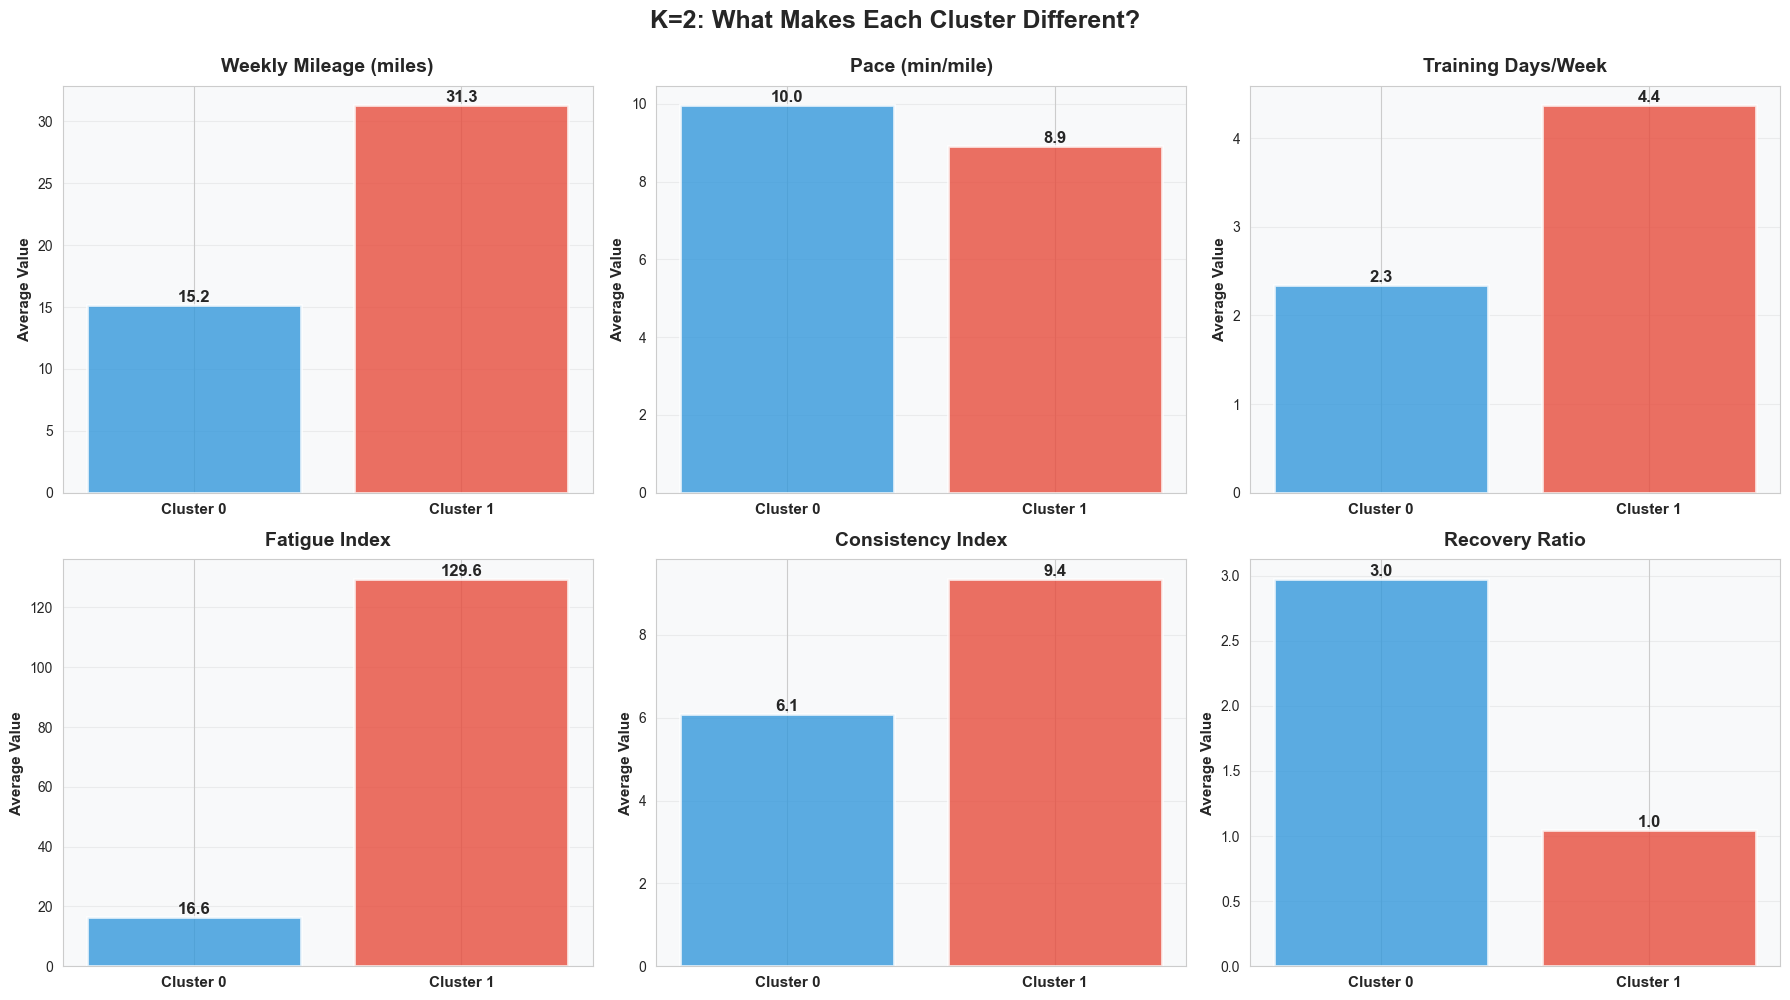

In [15]:
# Create bar chart visualization

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('K=2: What Makes Each Cluster Different?', 
             fontsize=18, fontweight='bold', y=0.995)

colors = ['#3498db', '#e74c3c']

for idx, (feature, title) in enumerate(zip(features_to_plot, titles)):
    row = idx // 3
    col = idx % 3
    
    values = cluster_means_k2[feature]
    bars = axes[row, col].bar(range(len(values)), values, color=colors, 
                               alpha=0.8, edgecolor='white', linewidth=2)
    
    axes[row, col].set_title(title, fontsize=14, fontweight='bold', pad=10)
    axes[row, col].set_ylabel('Average Value', fontsize=11, fontweight='bold')
    axes[row, col].set_xticks(range(len(values)))
    axes[row, col].set_xticklabels([f'Cluster {i}' for i in range(len(values))], 
                                    fontsize=11, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3, axis='y')
    axes[row, col].set_facecolor('#f8f9fa')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.1f}', ha='center', va='bottom', 
                           fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/cluster_bars_k2.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [17]:
# Fit K=3 model and prepare data for bar chart

# Fit K=3 model
kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init=20)
labels_k3 = kmeans_k3.fit_predict(scaled_data)

# Calculate cluster means
cluster_means_k3 = athlete_profiles.loc[scaled_data.index].copy()
cluster_means_k3['cluster'] = labels_k3
cluster_means_k3 = cluster_means_k3.groupby('cluster')[
    ['avg_weekly_mileage', 'avg_pace_km', 'avg_training_days', 
     'avg_fatigue_index', 'avg_consistency_index', 'avg_recovery_ratio']
].mean()

# Convert pace from min/km to min/mile (1 mile = 1.60934 km)
cluster_means_k3['avg_pace_mile'] = cluster_means_k3['avg_pace_km'] * 1.60934

print("K=3 Cluster means calculated!")
print("\nCluster Characteristics:")
print(cluster_means_k3[features_to_plot].round(2))

print(f"\nCluster Distribution:")
print(pd.Series(labels_k3).value_counts().sort_index())

K=3 Cluster means calculated!

Cluster Characteristics:
         avg_weekly_mileage  avg_pace_mile  avg_training_days  \
cluster                                                         
0                     18.89           9.94               2.70   
1                     10.33           9.98               1.88   
2                     32.07           8.82               4.49   

         avg_fatigue_index  avg_consistency_index  avg_recovery_ratio  
cluster                                                                
0                    24.15                   7.30                2.40  
1                     6.89                   4.42                3.75  
2                   141.73                   9.57                1.00  

Cluster Distribution:
0    60
1    41
2    14
Name: count, dtype: int64


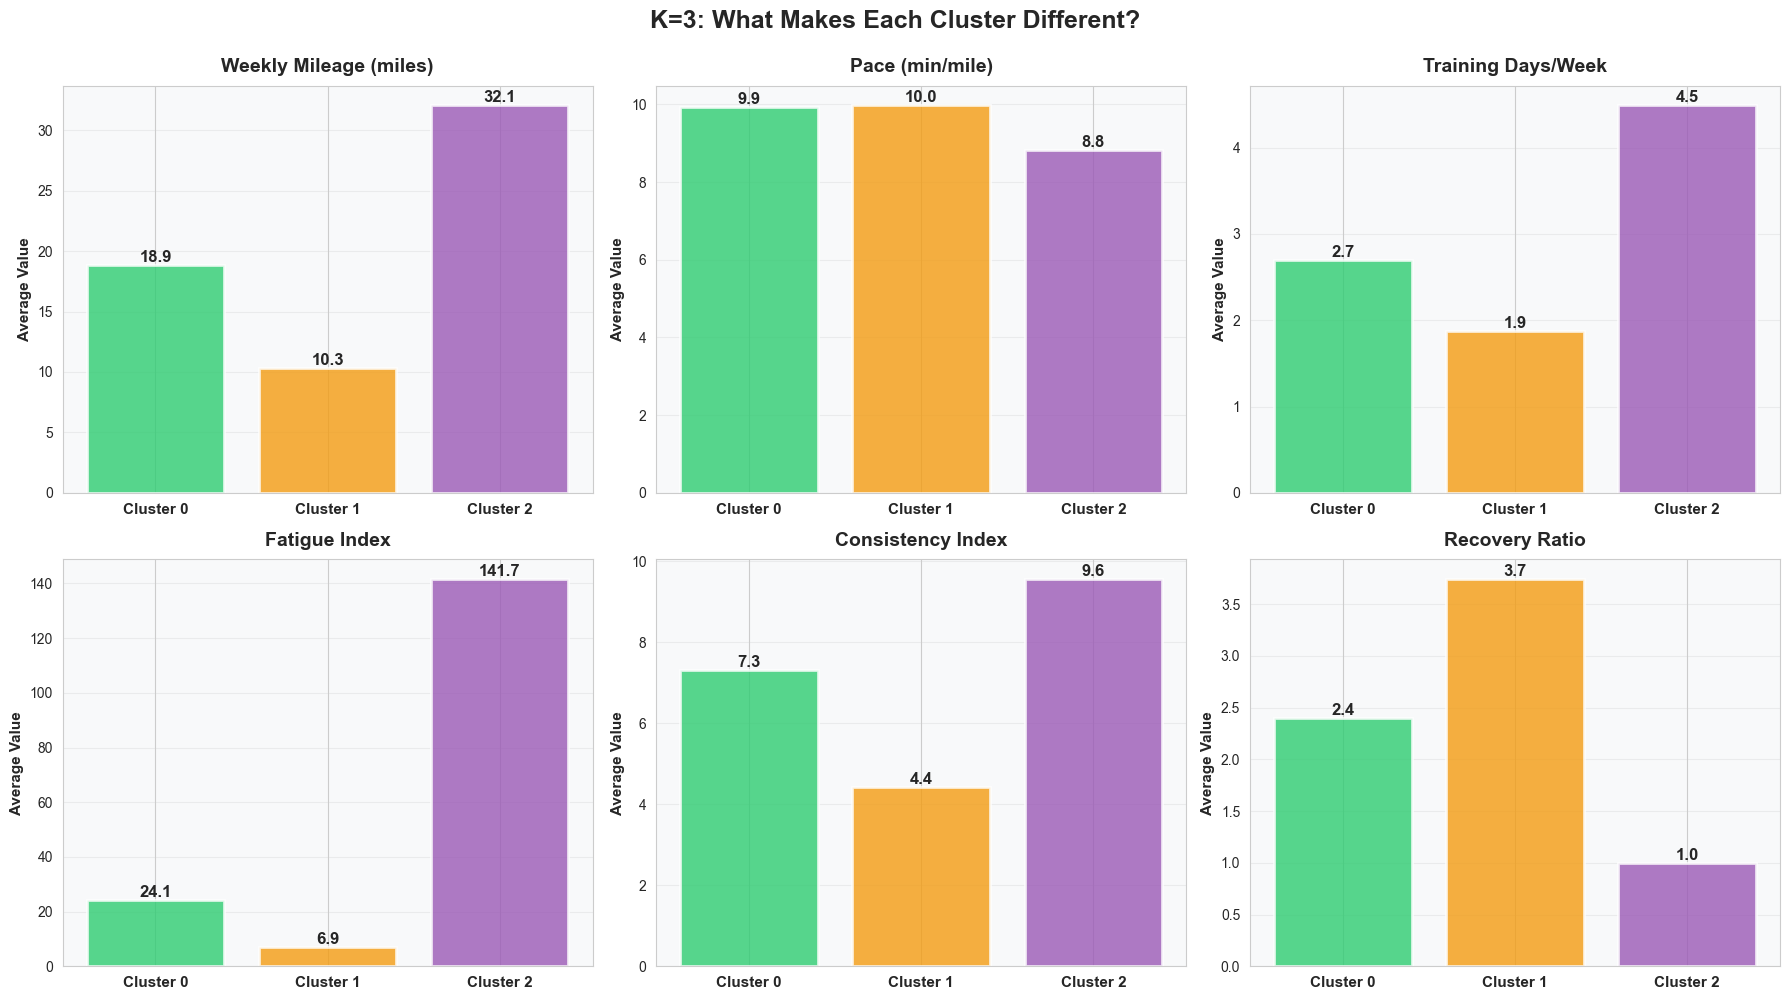

In [18]:
# Create bar chart visualization for K=3

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('K=3: What Makes Each Cluster Different?', 
             fontsize=18, fontweight='bold', y=0.995)

colors_k3 = ['#2ecc71', '#f39c12', '#9b59b6']  # Green, Orange, Purple

for idx, (feature, title) in enumerate(zip(features_to_plot, titles)):
    row = idx // 3
    col = idx % 3
    
    values = cluster_means_k3[feature]
    bars = axes[row, col].bar(range(len(values)), values, color=colors_k3, 
                               alpha=0.8, edgecolor='white', linewidth=2)
    
    axes[row, col].set_title(title, fontsize=14, fontweight='bold', pad=10)
    axes[row, col].set_ylabel('Average Value', fontsize=11, fontweight='bold')
    axes[row, col].set_xticks(range(len(values)))
    axes[row, col].set_xticklabels([f'Cluster {i}' for i in range(len(values))], 
                                    fontsize=11, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3, axis='y')
    axes[row, col].set_facecolor('#f8f9fa')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.1f}', ha='center', va='bottom', 
                           fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/cluster_bars_k3.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

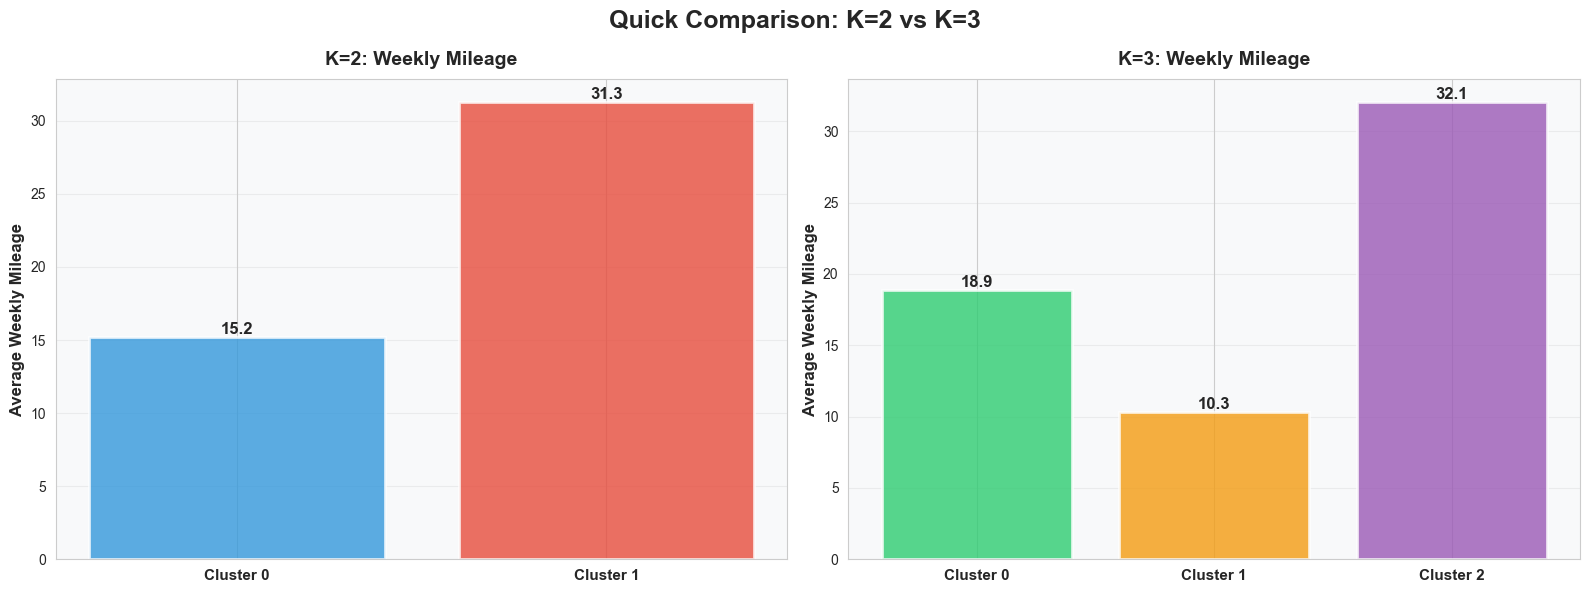

In [23]:
# Summary comparison: K=2 vs K=3 side-by-side for one feature

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Quick Comparison: K=2 vs K=3', fontsize=18, fontweight='bold', y=0.98)

# Choose most important feature - Weekly Mileage
feature = 'avg_weekly_mileage'

# K=2
values_k2 = cluster_means_k2[feature]
colors_k2 = ['#3498db', '#e74c3c']
bars = axes[0].bar(range(len(values_k2)), values_k2, color=colors_k2, 
                   alpha=0.8, edgecolor='white', linewidth=2)
axes[0].set_title('K=2: Weekly Mileage', fontsize=14, fontweight='bold', pad=10)
axes[0].set_ylabel('Average Weekly Mileage', fontsize=12, fontweight='bold')
axes[0].set_xticks(range(len(values_k2)))
axes[0].set_xticklabels([f'Cluster {i}' for i in range(len(values_k2))], fontsize=11, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_facecolor('#f8f9fa')
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# K=3
values_k3 = cluster_means_k3[feature]
colors_k3 = ['#2ecc71', '#f39c12', '#9b59b6']
bars = axes[1].bar(range(len(values_k3)), values_k3, color=colors_k3, 
                   alpha=0.8, edgecolor='white', linewidth=2)
axes[1].set_title('K=3: Weekly Mileage', fontsize=14, fontweight='bold', pad=10)
axes[1].set_ylabel('Average Weekly Mileage', fontsize=12, fontweight='bold')
axes[1].set_xticks(range(len(values_k3)))
axes[1].set_xticklabels([f'Cluster {i}' for i in range(len(values_k3))], fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_facecolor('#f8f9fa')
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/k2_vs_k3_mileage_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [24]:
# Add cluster labels to athlete_profiles
athlete_profiles_clustered = athlete_profiles.copy()
athlete_profiles_clustered['cluster'] = -1  # Initialize with -1

# Assign K=3 cluster labels
athlete_profiles_clustered.loc[scaled_data.index, 'cluster'] = labels_k3

# Save to CSV
athlete_profiles_clustered.to_csv('../data/athlete_profiles_clustered_k3.csv', index=True)

print("Cluster labels added and saved to athlete_profiles_clustered_k3.csv")
print(athlete_profiles_clustered['cluster'].value_counts().sort_index())
print(f'\nTotal athletes clustered: {(athlete_profiles_clustered["cluster"] != -1).sum()}')


Cluster labels added and saved to athlete_profiles_clustered_k3.csv
cluster
-1     1
 0    60
 1    41
 2    14
Name: count, dtype: int64

Total athletes clustered: 115


In [30]:
# Interpretation of K = 3 cluster characteristics with meaningful names and descriptions

# empty dictionary to hold cluster names and descriptions
cluster_info = {}

for cluster in range(3):

    # printing cluster number
    print(f'CLUSTER {cluster}\n')

    # getting cluster data
    cluster_data = cluster_means_k3[features_to_plot].loc[cluster]
    num_athletes = (labels_k3 == cluster).sum()

    print(f"Athletes: {num_athletes} ({num_athletes/len(labels_k3)*100:.1f}%)")
    print(f"\nCharacteristics:")
    print(f"  • Weekly Mileage: {cluster_data['avg_weekly_mileage']:.1f} miles")
    print(f"  • Pace: {cluster_data['avg_pace_mile']:.2f} min/mile")
    print(f"  • Training Days: {cluster_data['avg_training_days']:.1f} days/week")
    print(f"  • Fatigue Index: {cluster_data['avg_fatigue_index']:.1f}")
    print(f"  • Consistency: {cluster_data['avg_consistency_index']:.1f}")
    print(f"  • Recovery Ratio: {cluster_data['avg_recovery_ratio']:.2f}")

    # smart cluster naming based on characteristics
    mileage = cluster_data['avg_weekly_mileage']
    pace = cluster_data['avg_pace_mile']
    training_days = cluster_data['avg_training_days']

    # naming logic
    if mileage > 30:
        cluster_name = "The Competative Peak/Prime"
        # detailed description
        description = (
            f'This athlete trains at a high level, has frequent training days, and is an experienced runner.\n'
            f'They are likely preparing for competitive events and have a strong commitment to their training regimen.\n'
            f'This all comes with a very high fatigue index, indicating they are pushing their limits regularly. for competitive performance.\n'
        )
        # detailed reccommendation
        recommendation = (
            "1. Focus on race-specific training: Incorporate interval training, tempo runs, and long runs tailored to race goals.\n"
            "2. Prioritize active recovery: Focus on sleep, nutrition, foam rolling, and stretching.\n"
            "3. Implement structured periodization to manage fatigue and peak for key races.\n"
            "4. Monitor for signs of overtraining, given the high fatigue and low recovery scores.\n"
        ) 
    
    elif mileage > 15:
        cluster_name = "The Consistent Cruiser/Core"
        # detailed description
        description = (
            f'This athlete maintains a solid training routine with moderate mileage and consistent training days.\n'
            f'They balance their training well, showing good consistency and recovery, making them reliable performers.\n'
            f'This profile suggests a dedicated runner who values steady progress and injury prevention.\n'
        )
        # detailed reccommendation
        recommendation = (
            "1. Introduce one 'quality' day per week (e.g. tempo run or intervals) to improve pace.\n"
            "2. To build endurance, gradually increase long run distance by 10 percent every 1-2 weeks.\n"
            "3. Use cross-training (cycling, swimming) on rest days to enhance aerobic fitness without extra running stress.\n"
        )

    else:
        cluster_name = "The Foundation Builder/Base"
        # detailed description
        description = (
            f'This athlete is likely in the early stages of their running journey or focusing on building a solid foundation.\n'
            f'They have lower mileage and fewer training days (maybe due to a busy schedule), which is appropriate for their current fitness level.\n'
            f'This profile indicates a focus on gradual improvement and injury prevention.\n'
        )
        # detailed reccommendation
        recommendation = (
            "1. Focus on making running a consistent habit. Aim for 3 days/week, even if mileage is low.\n"
            "2. Gradually increase weekly mileage by no more than 10 percent per week to build endurance safely.\n"
            "3. Prioritize injury prevention with proper warm-up, cool-downs, and good running form.\n"
            "4. Incorporate strength training and flexibility exercises to support running form and prevent injuries.\n"
        )

    # storing cluster name and all of info in dictionary
    cluster_info[cluster] = {
        'name': cluster_name,
        'description': description,
        'recommendation': recommendation,
        'num_athletes': num_athletes,
        'characteristics': {
            'mileage': cluster_data['avg_weekly_mileage'],
            'pace': cluster_data['avg_pace_mile'],
            'training_days': cluster_data['avg_training_days'],
            'fatigue': cluster_data['avg_fatigue_index'],
            'consistency': cluster_data['avg_consistency_index'],
            'recovery': cluster_data['avg_recovery_ratio']
        }
    }
    # Print interpretation
    print(f"\nCluster Name: {cluster_name}")
    print(f"Description: \n{description}")
    print(f"Recommendations:\n{recommendation}")

print("\nCluster interpretation complete!")











CLUSTER 0

Athletes: 60 (52.2%)

Characteristics:
  • Weekly Mileage: 18.9 miles
  • Pace: 9.94 min/mile
  • Training Days: 2.7 days/week
  • Fatigue Index: 24.1
  • Consistency: 7.3
  • Recovery Ratio: 2.40

Cluster Name: The Consistent Cruiser/Core
Description: 
This athlete maintains a solid training routine with moderate mileage and consistent training days.
They balance their training well, showing good consistency and recovery, making them reliable performers.
This profile suggests a dedicated runner who values steady progress and injury prevention.

Recommendations:
1. Introduce one 'quality' day per week (e.g. tempo run or intervals) to improve pace.
2. To build endurance, gradually increase long run distance by 10 percent every 1-2 weeks.
3. Use cross-training (cycling, swimming) on rest days to enhance aerobic fitness without extra running stress.

CLUSTER 1

Athletes: 41 (35.7%)

Characteristics:
  • Weekly Mileage: 10.3 miles
  • Pace: 9.98 min/mile
  • Training Days: 1.9 d

In [31]:
# saves cluster_info to JSON file for use in other applications

import json

# convert cluster_info to JSON-friendly format
cluster_info_json = {}
for cluster_id, info in cluster_info.items():
    cluster_info_json[str(cluster_id)] = {
        'name': info['name'],
        'description': info['description'],
        'recommendation': info['recommendation'],
        'num_athletes': int(info['num_athletes']),
        'characteristics': {k: float(v) for k, v in info['characteristics'].items()}
    }

# Save to JSON
with open('../data/cluster_profiles.json', 'w') as f:
    json.dump(cluster_info_json, f, indent=4)

In [33]:
# Create comprehensive summary report for K=3 clustering

summary_report = f"""
{'='*80}
K-MEANS CLUSTERING ANALYSIS SUMMARY (K=3)
{'='*80}

MODEL PERFORMANCE:
  • Algorithm: K-Means Clustering
  • Number of Clusters: 3
  • Silhouette Score: {silhouette_score(scaled_data, labels_k3):.3f}
  • Davies-Bouldin Index: {davies_bouldin_score(scaled_data, labels_k3):.3f}
  • Total Athletes Analyzed: {len(labels_k3)}

{'='*80}
CLUSTER BREAKDOWN:
{'='*80}
"""

for cluster in range(3):
    info = cluster_info[cluster]
    pct = (info['num_athletes'] / len(labels_k3)) * 100
    
    summary_report += f"""
CLUSTER {cluster}: {info['name']}
{'─'*80}
Population: {info['num_athletes']} athletes ({pct:.1f}%)

Profile:
  • Weekly Mileage:     {info['characteristics']['mileage']:.1f} miles
  • Pace:               {info['characteristics']['pace']:.2f} min/mile
  • Training Days:      {info['characteristics']['training_days']:.1f} days/week
  • Fatigue Index:      {info['characteristics']['fatigue']:.1f}
  • Consistency:        {info['characteristics']['consistency']:.1f}
  • Recovery Ratio:     {info['characteristics']['recovery']:.2f}

Description:
  {info['description'].strip()}

Training Recommendations:
  {info['recommendation'].strip()}

"""

summary_report += f"""
{'='*80}
KEY INSIGHTS:
{'='*80}
  ✓ Three distinct athlete profiles successfully identified
  ✓ Clear progression: Foundation Builder → Consistent Cruiser → Competitive Peak
  ✓ Each cluster has unique training needs and recovery requirements
  ✓ {(60/115)*100:.1f}% are intermediate runners (largest group)
  ✓ {(14/115)*100:.1f}% are elite/competitive runners (need careful fatigue management)
  ✓ {(41/115)*100:.1f}% are building base fitness (focus on consistency)

{'='*80}
PRACTICAL APPLICATIONS:
{'='*80}
  1. Personalized Training Plans: Assign different workout types per cluster
  2. Injury Prevention: Cluster 2 needs enhanced recovery protocols
  3. Progress Tracking: Monitor athletes moving between clusters
  4. New Athlete Onboarding: Predict cluster membership for recommendations
  5. Resource Allocation: Focus coaching attention where most needed

{'='*80}
"""

print(summary_report)

# Save to text file
import os
os.makedirs('../reports', exist_ok=True)

with open('../reports/clustering_summary_k3.txt', 'w', encoding='utf-8') as f:
    f.write(summary_report)


K-MEANS CLUSTERING ANALYSIS SUMMARY (K=3)

MODEL PERFORMANCE:
  • Algorithm: K-Means Clustering
  • Number of Clusters: 3
  • Silhouette Score: 0.341
  • Davies-Bouldin Index: 0.980
  • Total Athletes Analyzed: 115

CLUSTER BREAKDOWN:

CLUSTER 0: The Consistent Cruiser/Core
────────────────────────────────────────────────────────────────────────────────
Population: 60 athletes (52.2%)

Profile:
  • Weekly Mileage:     18.9 miles
  • Pace:               9.94 min/mile
  • Training Days:      2.7 days/week
  • Fatigue Index:      24.1
  • Consistency:        7.3
  • Recovery Ratio:     2.40

Description:
  This athlete maintains a solid training routine with moderate mileage and consistent training days.
They balance their training well, showing good consistency and recovery, making them reliable performers.
This profile suggests a dedicated runner who values steady progress and injury prevention.

Training Recommendations:
  1. Introduce one 'quality' day per week (e.g. tempo run or int

In [34]:
# Create exportable cluster summary table

cluster_summary = pd.DataFrame({
    'Cluster_ID': range(3),
    'Cluster_Name': [cluster_info[i]['name'] for i in range(3)],
    'Num_Athletes': [cluster_info[i]['num_athletes'] for i in range(3)],
    'Pct_Athletes': [(cluster_info[i]['num_athletes']/len(labels_k3))*100 for i in range(3)],
    'Avg_Mileage': [cluster_info[i]['characteristics']['mileage'] for i in range(3)],
    'Avg_Pace_Min_Mile': [cluster_info[i]['characteristics']['pace'] for i in range(3)],
    'Avg_Training_Days': [cluster_info[i]['characteristics']['training_days'] for i in range(3)],
    'Avg_Fatigue': [cluster_info[i]['characteristics']['fatigue'] for i in range(3)],
    'Avg_Consistency': [cluster_info[i]['characteristics']['consistency'] for i in range(3)],
    'Avg_Recovery': [cluster_info[i]['characteristics']['recovery'] for i in range(3)]
})

cluster_summary = cluster_summary.round(2)

print("\nCLUSTER SUMMARY TABLE:")
print("="*80)
print(cluster_summary.to_string(index=False))
print("="*80)

# Save to CSV
cluster_summary.to_csv('../data/cluster_summary_k3.csv', index=False)


CLUSTER SUMMARY TABLE:
 Cluster_ID                Cluster_Name  Num_Athletes  Pct_Athletes  Avg_Mileage  Avg_Pace_Min_Mile  Avg_Training_Days  Avg_Fatigue  Avg_Consistency  Avg_Recovery
          0 The Consistent Cruiser/Core            60         52.17        18.89               9.94               2.70        24.15             7.30          2.40
          1 The Foundation Builder/Base            41         35.65        10.33               9.98               1.88         6.89             4.42          3.75
          2  The Competative Peak/Prime            14         12.17        32.07               8.82               4.49       141.73             9.57          1.00
